## RNN

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_classification

/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,log_loss
# Load the data from the CSV file
df6 = pd.read_excel('augbal.xlsx')

# Split the data into features (X) and labels (y)
X_text = df6.iloc[:, :2].apply(lambda x: ' '.join(x.astype(str)), axis=1)
y = df6.iloc[:, 2].values.astype(int) # Convert to integer type

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_text)

# Convert the vectorized features to a 3D array (batch size, sequence length, input dimension)
X = X.toarray()
X = np.expand_dims(X, axis=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load the preprocessed and balanced dataset
balanced_data = pd.read_excel('augbal.xlsx')

# Encode the 'Domain' column using label encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(balanced_data['Domain'])

# Apply one-hot encoding to the encoded labels
onehot_encoder = OneHotEncoder(sparse=False)
onehot_labels = onehot_encoder.fit_transform(encoded_labels.reshape(-1, 1))

# Update the 'Label' column in the dataset with the one-hot encoded labels
balanced_data['Label'] = list(onehot_labels)

# Split the dataset into train and test sets
X = balanced_data['Judgment']
y = balanced_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/opt/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### with dropout

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.models import Sequential

# Define the RNN model2 architecture
model2 = Sequential()
model2.add(SimpleRNN(units=32, input_shape=(None, 1)))
model2.add(Dropout(0.2)) # Adding dropout regularization
model2.add(Dense(units=1))

# Compile the model2
model2.compile(optimizer='adam', loss='mean_squared_error')

# Generate some dummy data
import numpy as np
X_train = np.random.rand(100, 10, 1)
y_train = np.random.rand(100, 1)


# Define a checkpoint to save the best model during training
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [6]:
# Train the model2
h= model2.fit(X_train, y_train, epochs=100, batch_size=64,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/100
2/2 [==============================] - 1s 252ms/step - loss: 0.4182 - val_loss: 0.2693
Epoch 2/100
2/2 [==============================] - 0s 64ms/step - loss: 0.2346 - val_loss: 0.1509
Epoch 3/100
2/2 [==============================] - 0s 64ms/step - loss: 0.2011 - val_loss: 0.0960
Epoch 4/100
2/2 [==============================] - 0s 63ms/step - loss: 0.1593 - val_loss: 0.0851
Epoch 5/100
2/2 [==============================] - 0s 65ms/step - loss: 0.1691 - val_loss: 0.0875
Epoch 6/100
2/2 [==============================] - 0s 63ms/step - loss: 0.1836 - val_loss: 0.0858
Epoch 7/100
2/2 [==============================] - 0s 63ms/step - loss: 0.1487 - val_loss: 0.0825
Epoch 8/100
2/2 [==============================] - 0s 63ms/step - loss: 0.1380 - val_loss: 0.0820
Epoch 9/100
2/2 [==============================] - 0s 62ms/step - loss: 0.1341 - val_loss: 0.0861
Epoch 10/100
2/2 [==============================] - 0s 61ms/step - loss: 0.1500 - val_loss: 0.0936
Epoch 11/100
2/2 [

In [7]:
model2.save('trained_model_rnn.h5')

/opt/miniconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


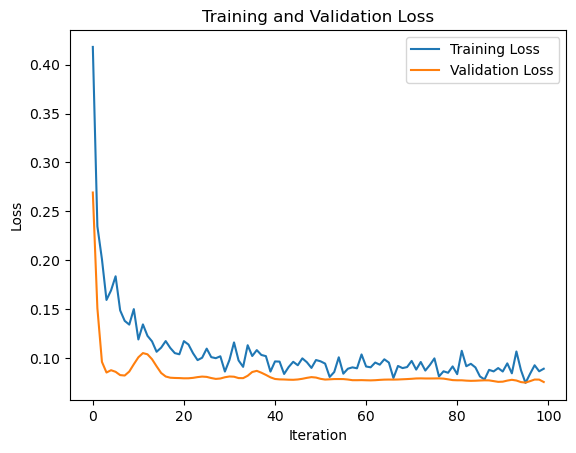

In [8]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'], label="Training Loss")
plt.plot(h.history['val_loss'], label="Validation Loss") 
plt.title("Training and Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show() 
# # Evaluate the model on training data
# train_loss = model2.evaluate(X_train, y_train, verbose=0)
# print(f'Training Loss: {train_loss:.4f}')

# # Evaluate the model on validation data
# valid_loss = model2.evaluate(X_test, y_test, verbose=0)
# print(f'Validation Loss: {valid_loss:.4f}')

In [28]:
# Evaluate the model on training data
train_results = model2.evaluate(X_train, y_train, verbose=0)
train_loss = train_results
train_acc = train_results
print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_acc:.4f}')

# # Evaluate the model on testing data
# test_results = model2.evaluate(X_test, y_test, verbose=0)
# test_loss = test_results
# test_acc = test_results
# print(f'Testing Loss: {test_loss:.4f}')
# print(f'Testing Accuracy: {test_acc:.4f}')

Training Loss: 0.0803
Training Accuracy: 0.0803


In [15]:
train_results

0.08032302558422089

In [16]:
# Preprocess the input data
judgment = '''Appeal (Civil Appeal No. 41 of 1949) against the judgment and decree of the Allahabad High Court (Allsop and Verma JJ.) dated 8th September, 1942, in First Appeal No. 473 of 1936, arising out of the decree of the Civil Judge, Bareilly, dated 30th September, 1936, in Original Suit No. 18 of 1934.

Walter Dutt (P.S. Safeer, with him) for the appellants.

P.I. Banerjee (Baleshwar Prasad, with him) for the respondents.

1951. March 19. The judgment of the Court was delivered by MUKHERJEA J.--This appeal is directed against an appel- late judgment of a Division Bench of the Allahabad High Court dated September 8, 1942, by which the learned Judges reversed a decree made in favour of the plaintiff by the Civil Judge of Bareilly in Original Suit No. 18 of 1934 and dismissed the suit as against defendants 1 to 4.

The suit out of which the appeal arises, was commenced by one Babu Ram as plaintiff and it was for 372 a declaration that the lands in suit appertained to a vil- lage named Sikha situated in Tehsil Aonla within the dis- trict of Bareilly, of which the plaintiff was the Zemindar and Lambardar, and that the defendants had no right or title to the same. There was a claim for recovery of possession in case the plaintiff was found to have been dispossessed from the whole or a portion of the disputed lands with an ancillary prayer for mesne profits. The original plaintiff died sometime after the plaint was filed and the suit was continued by his two sons, who were brought on the record as his heirs and successors. There were as many as 41 persons impleaded as parties defendants to the suit and they were alleged to have proprietory interest in two contiguous villages named Jhawa Nagla and Gurganwan which lie to the south and east of village Sikha.

The allegations as they appear in the plaint, in sub- stance, are that the river Ram Ganga flowed to the south and east of mouza Sikha belonging to the plaintiff and according to the custom of Dhar Dhura or deep stream boundary preva- lent in the locality, the main channel of the river consti- tutes the indisputable, though fluctuating, boundary line between village Sikha on one side and villages Jhawa Nagla and Gurganwan on the other. Up to Fasli year 1340 the course of the river, it is said, changed several times and the Zemindars of the three villages were deriving gains and suffering losses of land on account of these alluvial and diluvial changes. In the Fasli year 1340, the Dhar or main stream of the river was at the place marked C, D, E and F in the map attached to the plaint and the plaintiff, as Zemin- dar of village Sikha, possessed a tract of land shown on the map to which the dispute now relates and which was situated to the north-west of the stream and stretched on the north- ern and western side up to the limits of villages Sisauna, Hazipur and Sheopuri. In the year 1341 the river suddenly changed its course and leaving its old bed altogether began to flow entirely outside the limits of the three villages mentioned above. The "dabri" or the old bed of the river as it stood in the year 1340 373 has been shown in the plaint map and constitutes, according to the plaintiffs, the line of demarcation between Sikha on one side and the two villages Jhawa Nagla and Gurganwan on the other. It is alleged by the plaintiff that the custom of Dhar Dhura could not create any title in the defendants, who are the proprietors of villages Jhawa Nagla and Gurganwan, to the disputed plot, which is to the north and west of the main current of the river as it flowed in the year 1340, as the custom applies only when the change in the deep stream is gradual and not sudden and it cannot have any possible application when the river leaves the three villages alto- gether and ceases to flow within them as has happened in the present case. The different proprietors therefore should be allowed, according to the plaintiff, to hold and possess as appertaining to their Zemindary the lands which were in their respective possession in the year 1340;and in law and equity the disputed property should remain in possession of the plaintiff as owner of mouza Sikha. As the defendants were threatening to interfere with the plaintiff's posses- sion in collusion with the Patwari of the villages, the present suit was instituted.

Out of the 41 defendants, written statements were filed by 9 only. Two of them again admitted the plaintiffs' claim and pleaded that they were made parties to the suit unneces- sarily. The suit was really contested by defendants 1 to 4 and 30 and they resisted the plaintiffs' claim on a number of grounds, most of which are immaterial for our present purpose. The substantial case made by the contesting defend- ants was that the custom of Dhar Dhura applied to every sort of change in the deep stream of the river irrespective of the fact whether the change was gradual or sudden, or wheth- er the river flowed within or outside the villages; and as the river had receded to the north, the defendants were according to this custom entitled to the lands which had been joined to the lands of their villages up to the main channel of the river. It was asserted that the "dabri" or the old bed of the 374 river could not be treated as the demarcating line between the three villages.

Thus the existence of the custom of Dhar Dhura was affirmed by both the parties. The difference between them was as regards the extent of the custom. According to the plaintiffs, the custom was restricted in its operation to gradual accretion and did not extend to cases where old formations were suddenly severed by fluvial action without destroying their identity or preventing recognition of the land so removed. The second point raised by the plaintiffs was that the custom could not apply when the main stream had shifted entirely beyond the villages between which it was to form the boundary line.

On the first point the decision of the trial court was adverse to the plaintiffs, but on the other point the court decided in their favour. The result was that the plain- tiffs' claim was allowed and a decree was passed in accord- ance with the prayers made in the plaint. Against this decision the defendants 1 to 4 took an appeal to the High Court of Allahabad. The appeal was heard by a Division Bench consisting of Allsop and Verma JJ. who allowed the appeal to this extent that the plaintiffs' claim was dis- missed as against defendants Nos. 1 to 4 who had filed the appeal, though as regards the rest of the defendants the decision of the trial judge was kept intact. It is against this judgment that the plaintiffs got leave to appeal to the Privy Council and the appeal has now come up for hearing by this court. It has been brought to our notice that of the two plaintiffs who filed the appeal, one has since then compromised the suit with the contesting defendants and the appeal is being prosecuted before us on behalf of plaintiff No. 1 alone.

The learned Counsel appearing in support of the appeal has pressed for our consideration both the two points which were put forward in support of the plaintiff's case in the courts below. It has been contended in the first place that the evidence adduced in this case does not establish the custom of Dhar Dhura in 375 such extreme form as would create a change of ownership even when there is transfer of lands by a sudden change in the course of the deep stream. It is urged that even if such a custom is proved to exist, it should be held to be unreason- able and hence unenforceable in law. The other contention raised is that in any view there is no scope for application of the custom in the present case where the river has over- stepped the limits of the three villages and has ceased to be the dividing line between them.

As regards the first point, it seems to us that on the facts admitted and proved, it is not possible for us to take a view different from that taken by both the Courts below.

The meaning of the custom Dhar Dhura is that the deep stream or channel of a river is to be regarded, irrespective of its changes, as the constant boundary between two or more villages. Such custom is expressly recognised in section 2 of Regulation XI of 1825 which lays down that "whenever any clear and definite usage ...... may have been immemorially established for determining the rights of the proprietors of two or more contiguous estates divided by river (such as that the main channel of the river dividing the estates shall be the constant boundary between them whatever changes may take place in the course of the river by encroachment on one side and accession on the other), the usage so estab- lished shall govern the decision of all claims and disputes relating to alluvial lands between the parties." That such custom prevails in the locality is proved by the "Wazibu- larz" prepared at the last settlement of Mouza Sikha and the custom is there recorded as follows:-- "The river Ram Ganga flows on the boundary line of this village. The custom of Dhar Dhura prevails between this village and Gurganwan, Jhawa Nagla and Rakhara, Pargana Aonla. If any piece of land is included in the area of this village on account of the alluvial action of the river, we the Zemindars shall be the owners thereof and if any piece of land of this village is washed away, it shall be owned and possessed by the Zemindars of the village wherein it appears' in the 376 same way in which we were in possession thereof." The record thus speaks of change by alluvial action of the river. It does not say whether such alluvial action should be gradual or sudden; by itself, therefore, it does not indicate with precision the ambit of the right that is connoted by the custom. This is a matter which has got to be determined upon the evidence adduced by the parties and the onus of proof is undoubtedly on the person who sets up a custom at variance with the general law. We are in agreement with the view expressed by Oldfield J. in Sibt Ali v. Muniruddin (1) that the court should "scrutinise with care evidence in regard to a custom which would have the effect of passing from one owner to another land long held and enjoyed and of which the character is in no way altered by river action"; but if cogent and satisfactory evidence is forthcoming, there is no reason why the existence of such custom could not be estab- lished like any other fact. Apart from the oral evidence that has been adduced in this case there are two Rubkaris of the Collectorate and one judgment by a Civil Court to all of which the predecessors of the parties to the present litigation were parties and they show clearly that demarca- tion of the lands of the three villages has always been made with reference to the position of the deep stream of the river at different times and it was regarded as immaterial whether the change in the stream happened gradually or all on a sudden. From the Rubkari (Ex. H. 27) it appears that in 1283 Fasli the river suddenly altered its course and cut away not only the vacant accretion to Sikha but also a part of the mouza as it existed at the date of settlement. The land thus cut off was treated as an increment to Jhawa Nagla and Gurganwan and fresh settlement was made with the Zemin- dars of these villages. It is stated by the Assistant Collector of Bareilly in this Rubkari that the existence of the custom was proved by careful local investigation and it was to the effect that the bed of the river should always be held to be the boundary and that it should (1) I. L. R. 6 All. 479 at 481.

377 be so held whether the river suddenly altered its course or gradually encroached on any mouza. The Peshkar, who was deputed to make an enquiry, quoted ' a number of instances where the river altered its course both ways within the last 30 years prior to this date. This Rubkari, it is to be noted, is dated the 8th November, 1876. Ex. D-1 is a -judg- ment of the Subordinate Judge of Bareilly dated the 29th of July, 1907, and it was passed in a suit instituted by the proprietor of mouza Sikha against the owner of Jhawa Nagla.

The question raised was whether a quantity of land apper- taining to mouza Sikha which was detached by a sudden change in the course of the river and thrown on the Jhawa Nagla village could be claimed by the plaintiff. The answer was given in the negative, and the decision was based entirely upon the custom of Dhar Dhura which was held to be applica- ble even when the change was sudden. These documents fur- nish clear proof of the custom being held applicable to cases of the river suddenly altering its course and cutting off blocks of land from villages situated on one or other side of its channel. In the face of this clear and definite proof of the usage, we are unable to say that the decision of the courts below on this point is wrong.

It is urged by the learned counsel for the appellants that such custom is unreasonable and should for that reason be held to be unenforceable in law. It cannot be denied that the application of the deep stream rule might work injus- tice in certain cases as the gain or loss of property is made to depend upon accidental and uncertain phenomena or mere caprice of nature; but on the other hand the custom affords a convenient and effective way of avoiding boundary disputes which might otherwise be a fruitful source of strife and contention between riparian proprietors. A custom must not certainly be against reason, but the reason referred to here is not to be understood as meaning every unlearned man's reason but artificial and legal reason warranted by authority of law (1). It is sufficient if (1) Vide Coke on Littleton 49 378 no good legal reason can be assigned against it. Prevention of quarrels and disputes between contiguous villages and estates is certainly an object beneficial to the community and judged by this test, the custom of Dhar Dhura cannot be held to be unreasonable. It may be pointed out in this connection that in some shape or other this deep stream rule has been recognised in India from very early times as a convenient mode of settling boundary disputes and Brihas- pati, the Hindu Smriti writer, enunciates the rule in almost identical terms which has been referred to in the writings of later commentators as pointed out by Lal Mohan Doss in his Tagore Law Lectures on the Law of Riparian Rights C)- The first contention of the appellant, therefore, cannot be accepted.

The other contention put forward by the appellant raises the question as to whether the custom of Dhar Dhura could have any application to the facts of the present case where the river is not flowing within the villages at all. On this point, we think that the correct view has been taken by the learned Subordinate Judge and the reasons and the con- clusion of the High Court upon it do not appear to us to be sound.

If, as the custom of Dhar Dhura implies, the deep stream of a river irrespective of the changes in its course, is to be regarded as a fixed boundary line between two or more villages, it is absolutely necessary that the main stream of the river must flow within the limits of these villages. It is only for the purpose of determining the boundary between certain villages and estates that the custom of Dhar Dhura can be invoked; and-unless the river actually divides the villages or estates, there can be no question of its being regarded as a boundary line between them and in such circum- stances the deep stream rule cannot possibly have any mean- ing. A custom which defeats or has no relevancy to the very object for which it came into existence cannot under any circumstance be regarded as valid. We are not satisfied also that the evidence (1) Vide Doss on the Law of Riparian Rights p. 15, 178 379 in the record establishes the existence of such custom at all. Section 2 of Regulation XI of 1825 makes it perfectly clear that a custom contrary to the provisions of the Regu- lation would be enforceable only when it is a custom for determining the rights of proprietors of two or more contig- uous estates divided by the river. When the river ceases to divide the estates, the rights of 'the riparian proprietors can be determined only in accordance with the provisions made in the Regulation itself. It has been argued by Mr.

Banerjee, appearing for the respondents, that assuming that the custom of Dhar Dhura could not be invoked by the defend- ants when the river had receded beyond the limits of mouza Sikha, still the plaintiff in order to succeed in the suit must have to show how he acquired title to the tract of land lying to the north and west of the "dabri" or the old water course, which is the subject matter of the claim in the present suit. The answer to this argument would clearly be that when the main current of the river was at the place where the "dabri" stands at present, the entire stretch of land lying to the north west of the main stream came to the plaintiff under the custom of Dhar Dhura. In the year 1341 Fasli the river suddenly changed its course and as it shift- ed to the north and west beyond the limits of mouza Sikha, the custom of Dhar Dhura would no longer govern the rights of the parties and the title to the plot of land, which is the subject matter of dispute, must be determined in accord- ance with the provisions of the Regulation itself. As the change in the course of the river was sudden and not gradual and the character and identity of the land have remained intact, the plaintiff would clearly be entitled to possess the land on the strength of his original title as provided for in section 4, clause (2), of Regulation XI of 1825. In our opinion, therefore. the decision of the learned Judges of the High Court on this point is not correct and should be reversed.

Mr. Banerjee argues further that even if his clients cannot claim the disputed land under the custom of Dhar Dhura so long as the river flows outside the limits 380 of the village, their rights under the custom should revive as soon as the river comes down within the limits of mouza Sikha. This position certainly has got to be admitted but as we are concerned with the state of affairs existing at the date of the institution of the suit and there is no evidence on the record as to the position of the river at the present moment, the plaintiff will be entitled to a decree in the form as it was given by the trial judge, it being clearly understood that the rights declared in this suit would be subject to the custom of Dhar Dhura which the defendants may invoke if and when the proper occasion arises. Subject to this observation, we allow the appeal and restore the judgment of the trial judge. The plaintiff No.

1 will be entitled to his costs.

Appeal allowed.

Agent for the appellants: R.S. Narula.

Agent for the respondents: Tarachand Brijmohan Lal.'''

In [17]:
domain_labels = ['civil', 'criminal', 'marital', 'property', 'contract', 'employment', 'intellectual_property', 'tax', 'administrative', 'constitutional', 'international']

domain_keywords = {
    'civil': ['civil','appeal', 'judgment', 'decree', 'bombay high court', 'appeal no.', 'court of bombay city civil court', 'award no.', 'attorney-general of india', 'share broker', 'native share' ,'association', 'respondent', 'sales and purchases of shares', 'contract notes', 'arbitration', 'bombay securities contracts control act', 'void contracts', 'forward contracts', 'provincial government', 'recognised stock exchange', 'civil court', 'commission', 'brokerage', 'rules and regulations', 'principal and agent', 'sale and purchase of securities', 'arbitration act', 'rule 167', 'native share','association', 'ready delivery contracts', 'clearance sheets', 'tickets', 'settlement', 'modus operandi', 'association rules', 'arbi...','Lawsuit', 'Plaintiff', 'Breach of contract', 'Personal injury', 'Damages', 'Negligence', 'Property dispute', 'injunction', 'tort',  'negligence', 'compensation','civil court', 'civil procedure code', 'code of civil procedure', 'civil suit', 'plaintiff', 'defendant', 'petitioner', 'respondent', 'judgment', 'witness', 'stay order', 'injunction', 'execution', 'execution petition', 'arbitration', 'mediation', 'alternative dispute resolution', 'court fees', 'jurisdiction', 'interlocutory', 'interim order', 'review petition', 'revision petition', 'amicus curiae', 'ex parte', 'ad interim', 'lis pendens', 'res judicata', 'bona fide', 'fraud', 'breach of contract', 'specific performance', 'inherent jurisdiction', 'locus standi', 'public interest litigation', 'suo moto', 'writ petition', 'compliance', 'contempt of court', 'stay application','contract', 'property', 'partition', 'specific performance', 'restitution', 'injunction','execution', 'arbitration', 'mediation', 'alternative dispute resolution', 'court fees', 'jurisdiction', 'review petition', 'revision petition', 'amicus curiae', 'ex parte', 'lis pendens', 'res judicata', 'bona fide', 'fraud', 'breach of contract',  'specific performance', 'locus standi', 'public interest litigation', 'suo moto', 'writ petition', 'compliance', 'contempt of court'],
    'marital': ['marital','Divorce', 'Spouse', 'Alimony', 'Child custody', 'Separation agreement', 'Prenuptial agreement', 'Domestic violence', 'Adoption','matrimonial','marriage','spouse','husband','wife','divorce','annulment','alimony','maintenance','dowry','dowry harassment','domestic violence','conjugal rights','maintenance', 'conjugal rights', 'property settlement', 'matrimonial cruelty', 'restitution of conjugal rights', 'divorce petition', 'divorce decree', 'dowry harassment', 'domestic violence', 'adultery', 'child custody', 'guardianship'],
    'criminal': ['criminal','Offense', 'Defendant', 'Convicted', 'Guilty', 'Criminal law', 'Arrest', 'Trial', 'Sentencing','IPC', 'Indian Penal Code', 'criminal offense', 'criminal law', 'criminal procedure', 'criminal investigation', 'criminal trial', 'criminal jurisdiction', 'criminal liability', 'criminal punishment', 'criminal record', 'criminal appeal', 'criminal case', 'criminal procedure code', 'criminal code', 'criminal justice system', 'criminal court', 'criminal charges', 'criminal evidence', 'criminal sentencing', 'criminal prosecution', 'criminal act', 'criminal defense', 'criminal investigation agency', 'criminal procedure law', 'criminal trial court', 'criminal procedure rules', 'criminal offense code', 'criminal punishment law', 'criminal record check', 'criminal appeal court', 'criminal case law', 'criminal procedure act', 'criminal code section', 'criminal justice reform', 'criminal court system', 'criminal evidence act', 'criminal sentencing guidelines', 'criminal offense definition', 'criminal prosecution lawyer', 'criminal act definition', 'criminal defense attorney', 'criminal investigation department', 'criminal procedure code india', 'criminal trial process', 'criminal procedure rules india', 'criminal offense code india', 'criminal punishment law india', 'criminal record check india', 'criminal appeal court india', 'criminal case law india', 'criminal procedure act india', 'criminal code section india', 'criminal justice reform india', 'criminal court system india', 'criminal charges filed india', 'criminal evidence act india', 'criminal sentencing guidelines india', 'criminal offense definition india', 'criminal prosecution lawyer india', 'criminal act definition india', 'criminal defense attorney india', 'criminal investigation department india','petitions', 'art. 136', 'constitution', 'special leave', 'supreme court', 'high court', 'hyderabad', 'murder', 'conviction', 'death sentence', 'communist party', 'overthrow','communist regime', 'subscriptions', 'abduction', 'villagers', 'offences', 'special tribunal', 'military governor', 'nizam', 'appeals', 'dismissal', 'certificate', 'judicial committee', 'constitution of india', 'applicability', 'union of india', 'part b states', 'division bench', 'civil cases', 'hardship', 'jurisdiction', 'procedural right', 'territory of india', 'prospective', 'interpretation', 'independent state', 'appeal', 'construction', 'province of bombay', 'civil procedure code', 'criminal procedure code', 'letters patent', 'federal court', 'anomaly', 'sentences', 'pending', 'amendment', 'statute', 'interpret', 'congestion of work', 'true meaning', 'hard cases', 'natural construction', 'existing law', 'retrospective', 'existing government', 'existing law', 'plain natural meaning', 'constitutional interpretation', 'valuable rights', 'specific provisions', 'necessary circumstances', 'common ground', 'proper interpretation', 'an appeal', 'tribunals', 'larger meaning', 'an appeal', 'newly conferred', 'anomaly', 'pronounced', 'passed', 'territory', 'an application'],
    'employment': ['employment','Labor laws', 'Employment contract', 'Discrimination', 'Wrongful termination', 'Employee rights', 'Workplace harassment', 'Unfair dismissal', 'Employment tribunal'],
    'real estate': ['real estate','Property', 'Real estate transaction', 'Lease agreement', 'Zoning regulations', 'Title search', 'Property disputes', 'Landlord-tenant issues', 'Easements'],
    'taxation': ['taxation','tax planning', 'tax returns', 'tax audits', 'tax evasion', 'tax dispute', 'tax exemption', 'IRS', 'tax fraud'],
    'environmental': ['Environmental regulations', 'Pollution control', 'Natural resource management', 'Environmental impact assessment', 'Environmental litigation', 'Conservation', 'Hazardous waste', 'Sustainable development'],
    'labour law': ['labour law', 'workplace regulations', 'employment law', 'workers rights', 'labour rights', 'industrial disputes', 'industrial relations', 'minimum wage', 'wage theft', 'employee benefits', 'working hours', 'overtime', 'leave entitlements', 'labour standards', 'occupational safety', 'health regulations', 'factory acts', 'labour court', 'labour tribunal', 'trade unions', 'collective bargaining', 'termination', 'dismissal', 'retrenchment', 'redundancy', 'social security', 'employee compensation', 'labour inspection', 'labour disputes', 'labour legislation', 'labour enforcement', 'labour reforms', 'labour policies', 'labour welfare', 'labour protection', 'labour rights violations', 'labour-related offenses', 'labour tribunal judgments', 'labour court rulings', 'labour law amendments', 'labour law compliance','workplace regulations', 'employment law', 'workers rights', 'industrial disputes', 'industrial relations', 'minimum wage', 'employee benefits', 'working hours', 'overtime', 'leave entitlements', 'occupational safety', 'health regulations', 'labour court', 'trade unions', 'termination', 'dismissal', 'retrenchment', 'redundancy', 'social security', 'employee compensation', 'labour inspection', 'labour disputes', 'labour legislation', 'labour enforcement'],
    'constitution': ['constitutional', 'constitutionalism', 'constitutionalist', 'constitutionalize', 'constitutionalization', 'constitutional court', 'constitutional law', 'constitutional provisions', 'constitutional amendment', 'constitutional interpretation', 'constitutional rights', 'constitutional principles', 'constitutional framework', 'constitutional validity', 'constitutional challenge', 'constitutional governance', 'constitutional authority', 'constitutional duty', 'constitutional mandate','Constitution of India', 'fundamental rights', 'Directive Principles of State Policy', 'basic structure doctrine', 'judicial review', 'amendment', 'equality', 'freedom of speech', 'right to equality', 'right to life', 'right to education', 'right to privacy', 'reservation', 'social justice', 'secularism', 'federalism', 'parliament', 'President of India', 'Supreme Court', 'Chief Justice', 'Governor', 'Legislature', 'judiciary', 'citizenship', 'protection of minorities'],
    'family': ['family', 'marriage', 'divorce', 'matrimonial', 'custody', 'maintenance', 'alimony', 'dowry', 'domestic violence', 'child support', 'adoption', 'guardianship', 'inheritance', 'property division', 'conjugal rights', 'conjugal visitation', 'family court', 'family dispute', 'family law', 'family matter', 'family relationship', 'family rights', 'family welfare', 'family member', 'family protection', 'family responsibility','family dispute resolution', 'family counseling', 'marital property', 'child custody', 'spousal support', 'adoption process', 'guardianship rights', 'inheritance rights', 'domestic violence protection', 'family mediation', 'child visitation rights', 'family maintenance', 'divorce settlement', 'matrimonial property division', 'marriage registration', 'family protection laws', 'family harmony', 'family support', 'family values', 'family unity', 'family structure', 'family well-being', 'family unity', 'family responsibilities', 'family obligations','Petition', 'Administration', 'Will', 'Mother', 'Expired', 'Delhi', 'Survived', 'Daughters', 'Sons', 'Registered', 'Witnesses', 'Affidavits', 'Objections', 'Construction', 'Intention', 'Testator']
    }

In [18]:
import tensorflow as tf

# Load the trained model
loaded_model = tf.keras.models.load_model('trained_model_rnn.h5')



# Preprocess the input data
# judgment = "Your judgment text here"
judgment = judgment.lower()

# Find the domain based on the presence of domain keywords in the judgment
predicted_domain = None
for domain, keywords in domain_keywords.items():
    for keyword in keywords:
        if keyword in judgment:
            predicted_domain = domain
            break
    if predicted_domain:
        break

# If no matching keywords found, use the default domain label
if not predicted_domain:
    predicted_domain = domain_labels[0]

print("Predicted Domain:", predicted_domain)

Predicted Domain: civil
